In [456]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
%matplotlib inline

## Input dataset

In [449]:
df = pd.read_csv('device_failure.csv')

## Explore feature-feature relationship

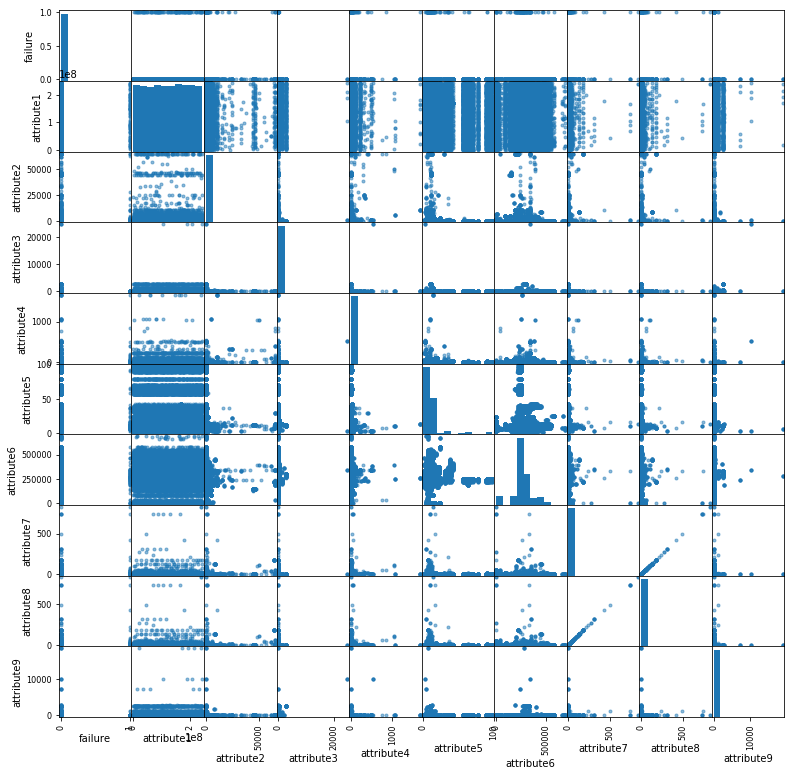

In [3]:
pd.scatter_matrix(df, alpha=0.5, figsize=(13, 13))
plt.show()

## Delete attribute7 due to its strict linearity with attribute8

In [3]:
del df['attribute7']

In [450]:
## Highly imbalanced data
print 'Percentage of failed data: ', len(df[df['failure'] == 1]) / float(len(df))

Percentage of failed data:  0.000851446656064


In [4]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,18701.000000


In [5]:
df.head(5)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3


In [6]:
df.shape

(124494, 11)

## Comments: for each device, there is one failure at most (the latest date), or there is no failure

In [7]:
df_failure_groupby_device = df[df['failure'] == 1].groupby(['device'])[['failure']]\
                            .count().sort_values(['failure'])
df_failure_groupby_device.sort

<bound method DataFrame.sort of           failure
device           
S1F023H2        1
W1F1BS0H        1
W1F1BFP5        1
W1F19BPT        1
W1F15S4D        1
W1F14XGD        1
W1F13SRV        1
W1F1230J        1
W1F11ZG9        1
W1F0Z4EA        1
W1F0Z3KR        1
W1F1BZTM        1
W1F0Z1W9        1
W1F0X4FC        1
W1F0WBTM        1
W1F0VDH2        1
W1F0TA59        1
W1F0T0B1        1
W1F0T074        1
W1F0T034        1
W1F0SGHR        1
W1F0Q8FH        1
W1F0PNA5        1
W1F0X5GW        1
W1F1C9TE        1
W1F1C9WG        1
W1F1CB5E        1
Z1F1FCH5        1
Z1F1AG5N        1
Z1F1901P        1
...           ...
S1F03YZM        1
S1F0QY11        1
Z1F1RJFA        1
S1F0RR35        1
S1F0RSZP        1
W1F0M35B        1
W1F0KCP2        1
W1F0GCAZ        1
W1F0FW0S        1
W1F0FKWW        1
W1F0F6BN        1
W1F08EDA        1
W1F03DP4        1
W1F03D4L        1
S1F13H80        1
S1F136J0        1
S1F135TN        1
S1F13589        1
S1F11MB0        1
S1F10E6M        1
S1F0TQCV      

## Count the number of rows (dates) for each failed device

In [8]:
fail_device_list = list(df_failure_groupby_device.index)
df_fail_device = df.loc[df['device'].isin(fail_device_list)]
df_fail_device_datecount = df_fail_device.groupby(['device'])[['date']].count().sort_values(['date'])
df_fail_device_datecount

,date
device,
S1F0RRB1,5
S1F10E6M,7
S1F0CTDN,7
S1F11MB0,7
Z1F1AG5N,9
W1F0PNA5,9
W1F13SRV,13
W1F03DP4,14
W1F1230J,14


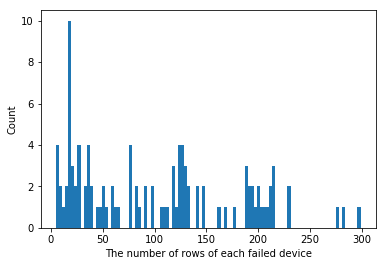

In [446]:
plt.hist(df_fail_device_datecount['date'], bins = 100)
plt.xlabel('The number of rows of each failed device')
plt.ylabel('Count')
plt.show()

## For devices with very small number of rows (date), it is difficult to extract enough informations, so I decide to keep devices whose number of row is equal to or larger than 10.

In [10]:
## List of devices whose number of rows is smaller than 10
df_date_count = df.groupby(['device'])[['date']].count().sort_values(['date'])
device_list_num_date_larger_10 = df_date_count[df_date_count['date'] >= 10].index
device_list_num_date_larger_10

Index([u'S1F0QYX3', u'S1F11AXR', u'W1F0W0RV', u'S1F13BTN', u'S1F0R2S6',
       u'S1F0R2RJ', u'Z1F02MRX', u'W1F1CMG4', u'W1F0X5KX', u'W1F0Y2PY',
       ...
       u'S1F0GCED', u'W1F0G9T7', u'S1F0FP0C', u'S1F0FGBQ', u'W1F0FZPA',
       u'Z1F0QL3N', u'W1F0FEH7', u'S1F0EGMT', u'S1F0E9EP', u'Z1F0QK05'],
      dtype='object', name=u'device', length=803)

In [11]:
## Remove devices whose number of row is smaller than 10
df = df[df['device'].isin(device_list_num_date_larger_10)]

## After this step,
## 6% failed devices are removed; 
## 1.8% rows removed

## Usually, I'd like to split dataset to training, validation, and test dataset.
## However, due to the very small number of failure data, I decide to split dataset to training data (80% devices) and testing data (20% devices), and optimize the model parameters based on cross-validation.

In [12]:
df_device_list = list(set(df['device']))
df_device_train_list, df_device_test_list = \
                        train_test_split(df_device_list, test_size = 0.2, random_state = 8)
df_train = df[df['device'].isin(df_device_train_list)]
df_test = df[df['device'].isin(df_device_test_list)]

In [448]:
print 'Failure devices percentage in raw data', float(len(df[df['failure'] == 1])) / len(df_device_list)
print 'Failure devices percentage in training data', \
       float(len(df_train[df_train['failure'] == 1])) / len(df_device_train_list)
print 'Failure devices percentage in testing data', \
       float(len(df_test[df_test['failure'] == 1])) / len(df_device_test_list)

Failure devices percentage in raw data 0.124533001245
Failure devices percentage in training data 0.132398753894
Failure devices percentage in testing data 0.0931677018634


## Explore feature performance with date
## The first and second columns are health devices
## The third and fourth columns are failure devices

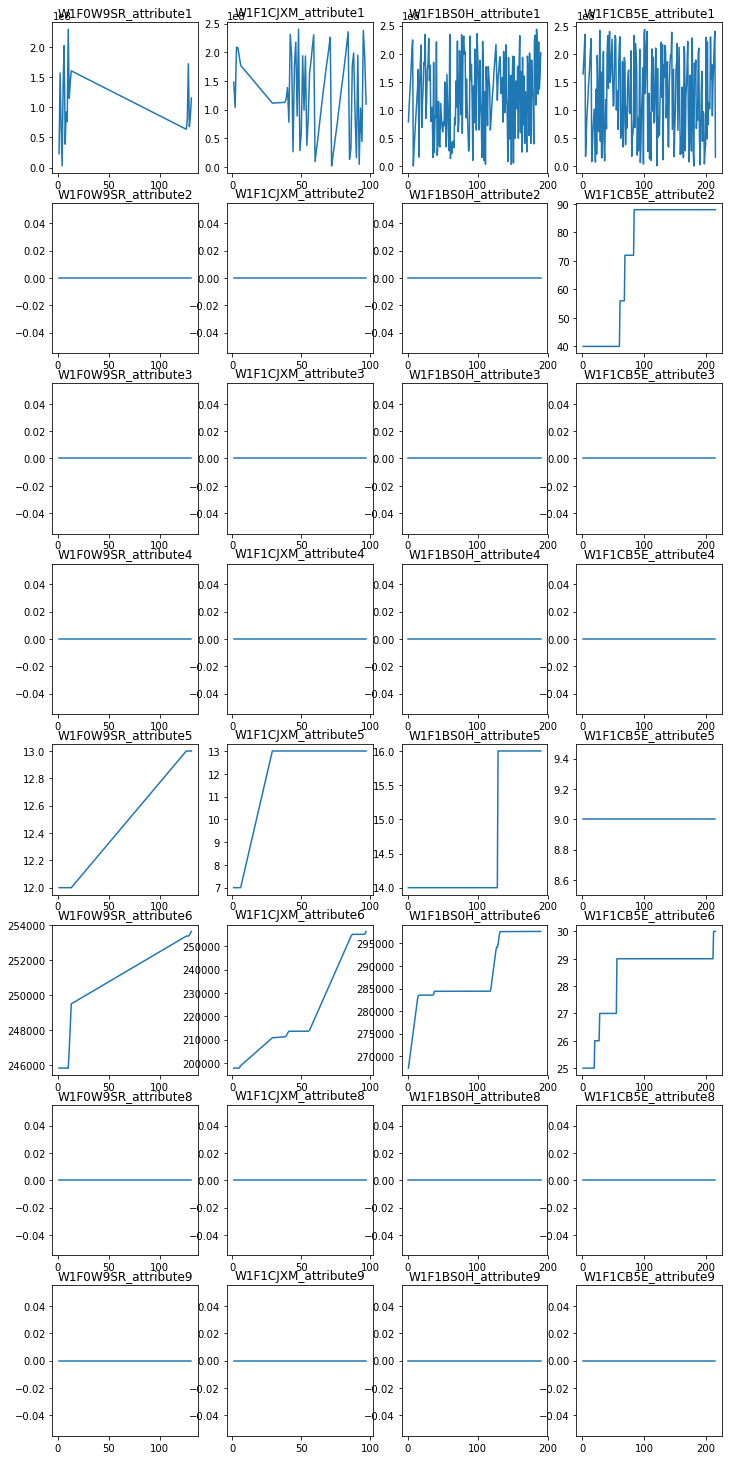

In [451]:
feature_plot_list = ['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5', \
                    'attribute6', 'attribute8', 'attribute9']
device_plot_list = ['W1F0W9SR', 'W1F1CJXM', 'W1F1BS0H', 'W1F1CB5E']

mpl_fig = plt.figure(figsize=(12, 26))
for device_index, device in enumerate(device_plot_list):
    device_index += 1
    for index, feature in enumerate(feature_plot_list):
        index += 1
        ax = mpl_fig.add_subplot(len(feature_plot_list),
                                 len(device_plot_list),
                                 (index-1)*len(device_plot_list)+device_index)
        ax.plot(df.loc[df['device'] == device, 'date']\
                 .astype("datetime64").dt.dayofyear.values,
                 df.loc[df['device'] == device, feature].values)
        ax.set_title(device + '_' + feature)

        if (index == len(feature_plot_list)) and (device_index == len(device_plot_list)):
            plt.show()

# Three more data engineering steps are performed: 
## 1. Targeted under sampling
       Due to highly imbalance dataset (only 0.085% failure data), a targeted under 
       sampling is applied to training dataset. For each device, data of the latest 
       date ("failure" only happened on latest date in the dataset), and the 6th, and
       7th earliest date are kept, because 
       (a) in the next step new features creation is based on 5 days info before 
       each specific date;
       (b) features on early dates far away from the last potential failure date is 
       more typical health data than those very close to the last date, which have 
       similar performance to the last-day date, based on above plots of feature
       performance exploration;
###      After under sampling, percentage of failure data increases by 2 orders to 4%

## 2. Normalizatoin
       For specific date of each device, normalize each feature to [0, 1], only 
       taking into account all data before and including that specific date data


## 3. New features creation
       Create two new types of features for each raw feature:
       (a) moving average 
       (b) standard deviation
       of data within 5 days before specific date

In [37]:
attribute_list_normalized = ['attribute1', 'attribute2', 'attribute3', 'attribute4', 
                            'attribute5', 'attribute6', 'attribute8', 'attribute9']

In [48]:
def normalized_column(df, column_list, row_index_all = 1):
    # Perform under sampling, normalization and new feature creation  
    # row_index_all = 1 used in testing data where all rows are preprocessed
    # row_index_all = 0 used in training data where only the 6th, 7th and last row 
    # are preprocessed
    device_list = list(set(df['device']))
    print len(device_list)
    for index, device in enumerate(device_list):   
        print index
        df_temp = df[df['device'] == device]
        df_temp_raw_index = list(df_temp.index)
        df_temp = df_temp.reset_index(drop=True)
        if row_index_all == 1:
            row_index = xrange(5,len(df_temp))
        else:
            row_index = [5, 6] + [len(df_temp)-1]
                
        for i in row_index:
            for feature in column_list:
                column_value = df_temp.iloc[:i+1][feature].values               
                attribute_normal_name_temp = feature + '_normal' 
                attribute_mean_name_temp = feature + '_mean' 
                attribute_std_name_temp = feature + '_std' 
                if max(column_value) == 0:
                    df.loc[df_temp_raw_index[i], attribute_normal_name_temp] = 0
                    df.loc[df_temp_raw_index[i], attribute_mean_name_temp] = 0
                    df.loc[df_temp_raw_index[i], attribute_std_name_temp] = 0
                elif (max(column_value) != 0) and (max(column_value) == min(column_value)):
                    df.loc[df_temp_raw_index[i], attribute_normal_name_temp] = 1
                    df.loc[df_temp_raw_index[i], attribute_mean_name_temp] = 0
                    df.loc[df_temp_raw_index[i], attribute_std_name_temp] = 0                    
                else:
                    column_value_last5 = (column_value[-6:-1]-min(column_value))/\
                                    float(max(column_value)-min(column_value))
                    df.loc[df_temp_raw_index[i], attribute_normal_name_temp] = \
                            (df.loc[df_temp_raw_index[i], feature]-min(column_value))/\
                            float(max(column_value)-min(column_value))
                    df.loc[df_temp_raw_index[i], attribute_mean_name_temp] = \
                                                            np.mean(column_value_last5)
                    df.loc[df_temp_raw_index[i], attribute_std_name_temp] = \
                                                            np.std(column_value_last5)
    df.drop(column_list, axis=1, inplace=True)
    return df

In [ ]:
df_test_normal = normalized_column(df_test, attribute_list_normalized, 1)

In [64]:
df_test_normal = df_test_normal.dropna()
df_test_normal.to_csv("df_test_normalized_new_feature_v3.csv", index = False)

In [ ]:
df_train_normal = normalized_column(df_train, attribute_list_normalized, 0)

In [67]:
df_train_normal = df_train_normal.dropna()
df_train_normal.to_csv("df_train_normalized_new_feature_v3.csv", index = False)

# Neural Network Model will be used here
## (a) Parameter optimization is based on 8-fold cross validation
## (b) As to metrics, due to imbalanced dataset, I will focus on recall, precision, and F1 score, rather than accuracy, which will listed for reference though
## (c) A predefined parameter -- tolerence day, will be introduced and discussed in the end

In [345]:
df_train_cp = df_train_normal.copy()
df_test_cp  = df_test_normal.copy()

## Training and test data preparation

In [70]:
y_train = df_train_cp.pop('failure').ravel()
del df_train_cp['date']
del df_train_cp['device']
x_train = df_train_cp.values

In [346]:
y_test = df_test_cp.pop('failure').ravel()
del df_test_cp['date']
del df_test_cp['device']
x_test = df_test_cp.values

## Parameter optimization

In [73]:
## Grid searching optimal parameters using 8-fold cross validation
NN_search = MLPClassifier(hidden_layer_sizes=(64,32,16))
NN_grid = {'batch_size': [32, 64, 128],
           'max_iter': [1000, 2000],
           'activation': ['tanh', 'relu'],
           'solver': ['sgd', 'adam'],
           'alpha': [0.001, 0.0001, 0.00001],
           'learning_rate_init': [0.0001, 0.001, 0.01],
           'tol': [0.0001, 0.001],
           'learning_rate': ['constant', 'invscaling', 'adaptive']}
GS_search = GridSearchCV(estimator=NN_search, param_grid = NN_grid, cv=8)
GS_search.fit(x_train,y_train)
print "Best NN params: %s " % GS_search.best_params_

/Users/miyan/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Best NN params: {'solver': 'adam', 'activation': 'tanh', 'max_iter': 2000, 'batch_size': 32, 'tol': 0.0001, 'alpha': 0.0001, 'learning_rate': 'invscaling', 'learning_rate_init': 0.01} 


In [457]:
def display_confusion_matrix(y_pred, y_real):
    ## display confusion matrix and important metrics
    print 'Accuracy:        ', accuracy_score(y_real, y_pred)
    print 'Precision:       ', precision_score(y_real, y_pred)
    print 'Recall:          ', recall_score(y_real, y_pred)
    print 'F1 score:        ', f1_score(y_real, y_pred)

    confu_mat = confusion_matrix(y_real, y_pred)
    print 'Confution Matrix'
    print ' ----------------------------------'
    print '|          | Pred  (1) | Pred (0) |'
    print ' ----------------------------------'
    print '| Act  (1) |    %d     |    %d     |' %(confu_mat[1,1], confu_mat[1, 0])
    print '| Act  (0) |    %d     |    %d |' %(confu_mat[0,1], confu_mat[0, 0])
    print ' ----------------------------------'

## Train the final model based on the optimal parameters

In [458]:
mlp = MLPClassifier(batch_size = 32, 
                    hidden_layer_sizes=(64, 32, 16),
                    max_iter = 2000, 
                    learning_rate = 'invscaling',
                    solver = 'adam',
                    activation = 'tanh',
                    tol = 0.0001,
                    alpha = 0.0001,
                    learning_rate_init=0.01,
                    random_state = 2)
mlp.fit(x_train, y_train)
print "----Training Dataset---------------------"
display_confusion_matrix(mlp.predict(x_train), y_train)
print "\n\n----Testing  Dataset---------------------"
display_confusion_matrix(mlp.predict(x_test), y_test)

----Training Dataset---------------------
Accuracy:         0.972481827622
Precision:        0.813953488372
Recall:           0.4375
F1 score:         0.569105691057
Confution Matrix
 ----------------------------------
|          | Pred  (1) | Pred (0) |
 ----------------------------------
| Act  (1) |    35     |    45     |
| Act  (0) |    8     |    1838 |
 ----------------------------------


----Testing  Dataset---------------------
Accuracy:         0.996693208023
Precision:        0.141176470588
Recall:           0.8
F1 score:         0.24
Confution Matrix
 ----------------------------------
|          | Pred  (1) | Pred (0) |
 ----------------------------------
| Act  (1) |    12     |    3     |
| Act  (0) |    73     |    22895 |
 ----------------------------------


# Introduction to tolerence day
## (a) Based on above plots of feature performance, features of date very close to the failure day perform very similar to those of the failure day. In real cases, failure alarm several days earlier (the parameter 'tolerance_date' in the following function) than the true fail is necessary. 
## (b) Next I will show how metrics change if treating the predicted failure (1) within "tolerance_date" before the true failure date as correct prediction

In [444]:
def adjusted_y_pred_fn(df_test, model, tolerance_date):
    ### Given testing dataframe, trained model, and tolerance_date, return true y_test, and
    ### y_test_pred_adjusted, which is equal to 1 ONLY if y_test_pred = 1 AND its date 
    ## is within "tolerance_date" days before true failure date for each failed device
    df_test_cp = df_test.copy()
    df_test_cp = df_test_cp.sort_values(['device', 'date'])
    df_test_cp = df_test_cp.reset_index(drop=True)
    df_test_cp2 = df_test_cp.copy()
    y_test = df_test_cp['failure'].ravel()
    y_test_cp = y_test.copy()
    
    del df_test_cp2['failure']
    del df_test_cp2['date']
    del df_test_cp2['device']
    x_test = df_test_cp2.values
    y_test_pred = model.predict(x_test)
    
    ## Revalue "failure"
    df_test_cp['failure'] = y_test_pred    

    failed_device_list = list(df_test_cp.loc[df_test_cp['failure'] == 1, 'device'])
    for index_device, device in enumerate(failed_device_list):
        df_temp = df_test_cp[df_test_cp['device'] == device]
        raw_index = df_temp.index
        for i in range(2, min(tolerance_date+2, len(df_temp)+1)):
            last_day = pd.Timestamp(df_temp.iloc[-1]['date'])
            current_day = pd.Timestamp(df_temp.iloc[-i]['date'])
            day_diff = (last_day - current_day).days
            if day_diff <= tolerance_date:
                df_test_cp.loc[raw_index[len(df_temp) - i], 'failure'] = 0
    ## Up to here, in df_test_cp, "failure" are relabelled to "0" within "tolerance_date" days 
    ## before the failure day    

    y_test_pred_adjusted = df_test_cp['failure']
    
    return x_test, y_test_cp, y_test_pred, y_test_pred_adjusted 

In [459]:
## Given 10 days alarm
tolerance_date = 10
x_test, y_test, y_test_pred, y_test_pred_adjusted = \
                                adjusted_y_pred_fn(df_test_normal, mlp, tolerance_date)
print "----Testing  Dataset---------------------"
display_confusion_matrix(y_test_pred, y_test)

print "\n\n----Testing  Dataset, tolerance_date = %d---------" %(tolerance_date)
display_confusion_matrix(y_test_pred_adjusted, y_test)

----Testing  Dataset---------------------
Accuracy:         0.996693208023
Precision:        0.141176470588
Recall:           0.8
F1 score:         0.24
Confution Matrix
 ----------------------------------
|          | Pred  (1) | Pred (0) |
 ----------------------------------
| Act  (1) |    12     |    3     |
| Act  (0) |    73     |    22895 |
 ----------------------------------


----Testing  Dataset, tolerance_date = 10---------
Accuracy:         0.998346604012
Precision:        0.255319148936
Recall:           0.8
F1 score:         0.387096774194
Confution Matrix
 ----------------------------------
|          | Pred  (1) | Pred (0) |
 ----------------------------------
| Act  (1) |    12     |    3     |
| Act  (0) |    35     |    22933 |
 ----------------------------------


## Comments: it is noticed that with 10 days alarm, the false positive drops by 52% from 73 to 35, and corresponding metrics, i.e. precision and F1 score, improve significantly

# Outlook
## Two more modeling solutions
## 1. Regression model to predict the remaining useful life
## 2. Multi-class classification where the failure day is relabelled as "2", several days exactly before the failure day are relabelled as "1", other healthy days are kept as "0"